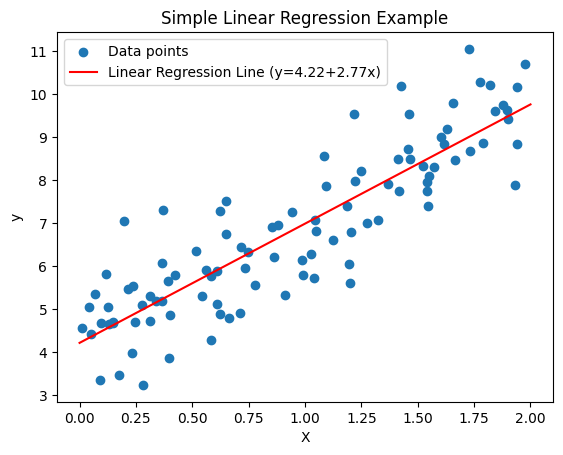

In [ ]:
#Linear Regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate synthetic data
np.random.seed(42)
X = 2 * np.random.rand(100, 1)  # Random feature
y = 4 + 3 * X + np.random.randn(100, 1)  # Linear relationship with noise

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the parameters (slope and intercept)
slope = model.coef_[0][0]
intercept = model.intercept_[0]

# Make predictions using the model
X_new = np.array([[0], [2]])  # Two new data points for prediction
y_pred = model.predict(X_new)

# Plot the data and the linear regression line
plt.scatter(X, y, label='Data points')
plt.plot(X_new, y_pred, 'r-', label=f'Linear Regression Line (y={intercept:.2f}+{slope:.2f}x)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.title('Simple Linear Regression Example')
plt.show()


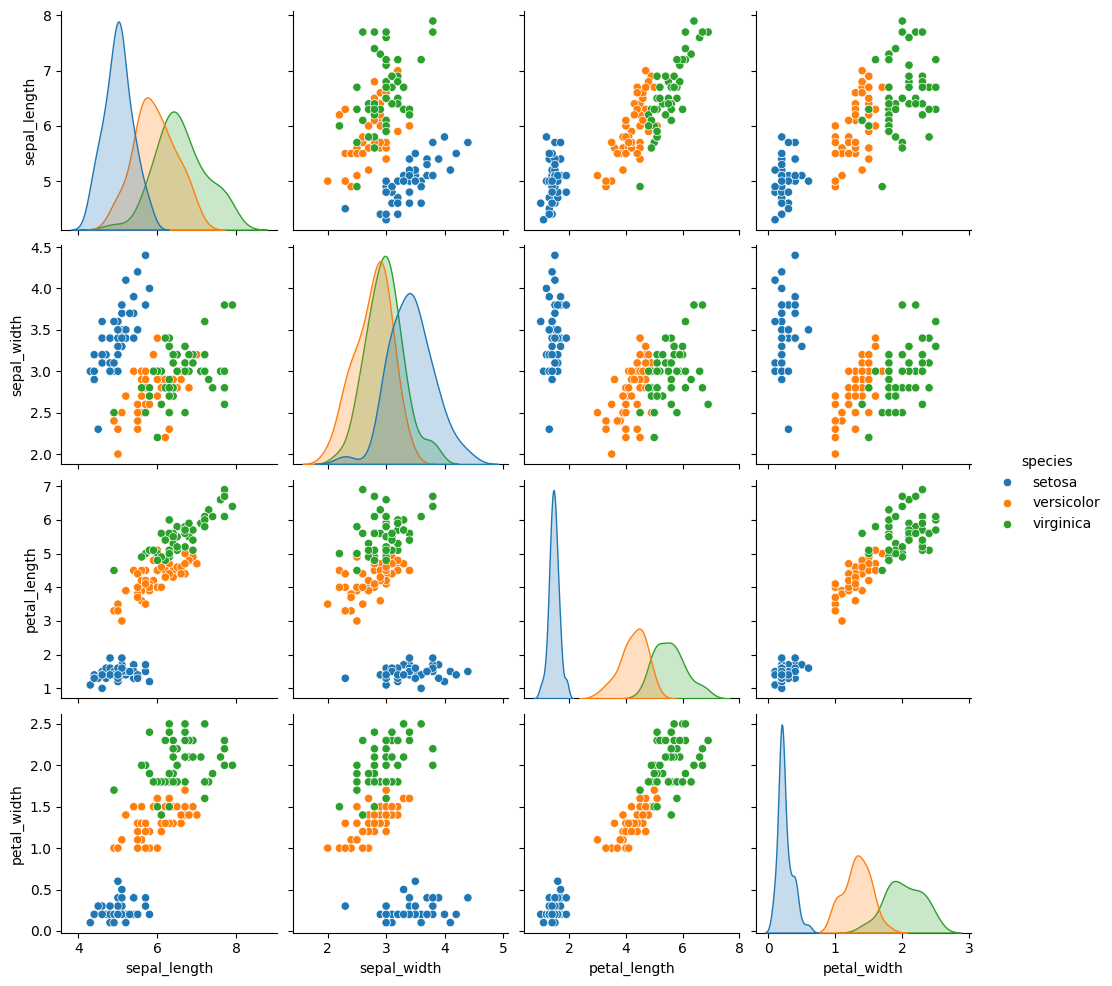

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Create a pairplot
sns.pairplot(iris, hue="species")
plt.show()


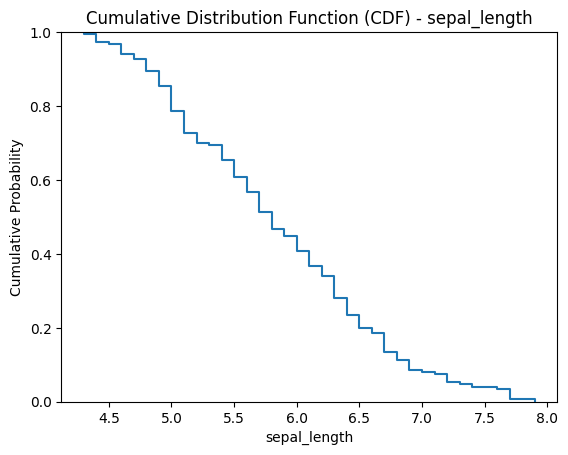

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

# Load the Iris dataset
iris = sns.load_dataset("iris")

# Choose a feature for CDF (e.g., sepal_length)
feature = "sepal_length"
data = iris[feature]

# Create CDF using seaborn's ecdfplot
sns.ecdfplot(data, stat="proportion", complementary=True)

# Add labels and title
plt.xlabel(f'{feature}')
plt.ylabel('Cumulative Probability')
plt.title(f'Cumulative Distribution Function (CDF) - {feature}')

# Show the plot
plt.show()


In [ ]:
#MLP Classifier
import numpy as np

class Perceptron:
    def __init__(self, input_size, learning_rate=0.01, epochs=100):
        self.weights = np.zeros(input_size + 1)
        self.learning_rate = learning_rate
        self.epochs = epochs

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return 1 if summation > 0 else 0

    def train(self, training_inputs, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

# Different training data and labels
training_data = np.array([
    [0.2, 0.8],
    [0.4, 0.6],
    [0.5, 0.5],
    [0.7, 0.3]
])

labels = np.array([0, 0, 1, 1])

# Initialize Perceptron
input_size = training_data.shape[1]
perceptron = Perceptron(input_size)

# Train the Perceptron
perceptron.train(training_data, labels)

# Different testing data
test_data = np.array([
    [0.1, 0.9],
    [0.6, 0.4],
    [0.3, 0.7],
    [0.8, 0.2]
])

# Test the trained model
for inputs in test_data:
    prediction = perceptron.predict(inputs)
    print(f"Input: {inputs}, Prediction: {prediction}")


Input: [0.1 0.9], Prediction: 0
Input: [0.6 0.4], Prediction: 1
Input: [0.3 0.7], Prediction: 0
Input: [0.8 0.2], Prediction: 1


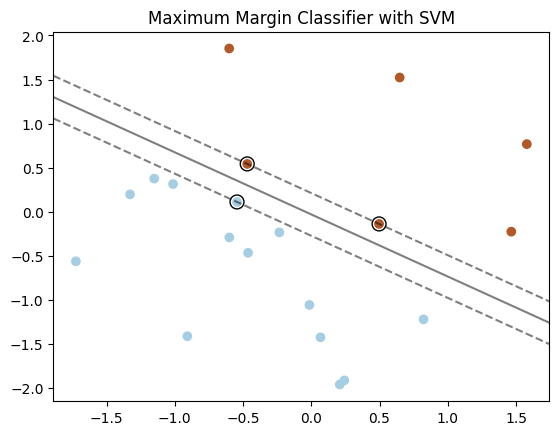

In [ ]:
#SVM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Generating synthetic data for illustration
np.random.seed(42)
X = np.random.randn(20, 2)  # 20 data points with 2 features
y = np.where(X[:, 0] + X[:, 1] > 0, 1, -1)  # Creating labels based on a linear decision boundary

# Fit the SVM model with a linear kernel and a large C value for hard-margin
C_value = 1e6  # Use a large value to approximate a hard-margin SVM
clf = svm.SVC(kernel='linear', C=C_value)
clf.fit(X, y)

# Plotting the decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
ax = plt.gca()

# Plot the decision boundary
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))

# Plot decision function for each datapoint in the grid
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and margins
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Highlight support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.title('Maximum Margin Classifier with SVM')
plt.show()


In [ ]:
#kfold
import numpy as np
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

# Generate synthetic data for illustration
np.random.seed(42)
X = np.random.randn(200, 2)  # 200 data points with 2 features
y = np.where(X[:, 0] + X[:, 1] > 0, 1, 0)  # Creating binary labels based on a linear decision boundary

# Initialize Logistic Regression model
model = LogisticRegression()

# Specify the number of folds for cross-validation
num_folds = 5

# Create a KFold object
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform K-fold cross-validation
cross_val_results = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Display cross-validation results
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {np.mean(cross_val_results):.4f}')
print(f'Standard Deviation: {np.std(cross_val_results):.4f}')


Cross-Validation Results (Accuracy): [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0000
Standard Deviation: 0.0000


In [ ]:
#Decision Tree
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

# Fit the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Print the accuracy
accuracy = sum(y_pred == y_test) / len(y_test)
print(f"Accuracy: {accuracy:.2f}")

# Display the decision tree rules
tree_rules = export_text(clf, feature_names=iris.feature_names)
print("\nDecision Tree Rules:")
print(tree_rules)


Accuracy: 1.00

Decision Tree Rules:
|--- petal length (cm) <= 2.45
|   |--- class: 0
|--- petal length (cm) >  2.45
|   |--- petal length (cm) <= 4.75
|   |   |--- petal width (cm) <= 1.65
|   |   |   |--- class: 1
|   |   |--- petal width (cm) >  1.65
|   |   |   |--- class: 2
|   |--- petal length (cm) >  4.75
|   |   |--- petal width (cm) <= 1.75
|   |   |   |--- petal length (cm) <= 4.95
|   |   |   |   |--- class: 1
|   |   |   |--- petal length (cm) >  4.95
|   |   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |   |--- class: 2
|   |   |--- petal width (cm) >  1.75
|   |   |   |--- petal length (cm) <= 4.85
|   |   |   |   |--- sepal width (cm) <= 3.10
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- sepal width (cm) >  3.10
|   |   |   |   |   